In [1]:
import pandas as pd

df = pd.read_csv("burnout_search_results.csv")

df["similarity_score"].describe()


count    283.000000
mean       0.316453
std        0.065930
min        0.250353
25%        0.269659
50%        0.293793
75%        0.336242
max        0.617340
Name: similarity_score, dtype: float64

<Axes: >

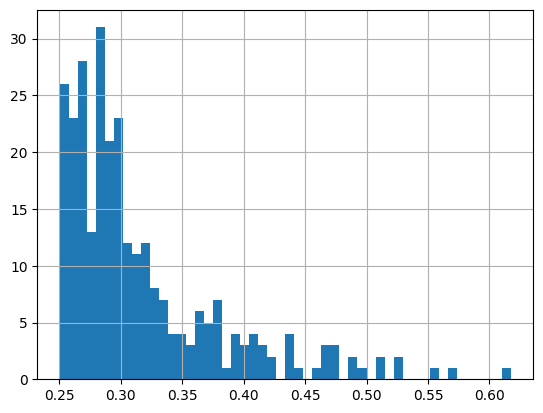

In [2]:

df["similarity_score"].hist(bins=50)

In [3]:
print(">=0.45:", (df["similarity_score"] >= 0.45).sum())
print("0.30–0.45:", df["similarity_score"].between(0.30, 0.45).sum())
print("<0.30:", (df["similarity_score"] < 0.30).sum())


>=0.45: 17
0.30–0.45: 105
<0.30: 161


In [ ]:
df_high = df[df["similarity_score"] >= 0.45]


df_mid = df[
    df["similarity_score"].between(0.30, 0.45)
].sample(70, random_state=42)

df_low = df[
    df["similarity_score"] < 0.30
].sample(90, random_state=42)

df_label_pool = (
    pd.concat([df_high, df_mid, df_low])
      .sample(frac=1, random_state=42)
      .reset_index(drop=True)
)

df_label_pool = df_label_pool[["id", "text", "similarity_score"]]
df_label_pool["label"] = ""

df_label_pool.to_csv("manual_label_batch1.csv", index=False)
print(len(df_label_pool))
